In [6]:
import pandas as pd

df = pd.read_csv('Churn_Modeling.csv')

# Display 10 
df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
import pandas as pd

df = pd.read_csv('Churn_Modeling.csv')
# Display basic info about the DataFrame
print("\nDataFrame Info:")
display(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

In [9]:
# Check for duplicated CustomerId
duplicates = df[df.duplicated('CustomerId', keep=False)]
print(duplicates)

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [11]:
#Number of duplicates in CustomerId?
duplicate_count = df['CustomerId'].duplicated().sum()
print(f"Number of duplicate customerIDs: {duplicate_count}")

Number of duplicate customerIDs: 0


In [5]:
invalid_rows = df[df['Surname'].str.contains('\?')]

if not invalid_rows.empty:

    print(invalid_rows)

else:

    print("No invalid rows here!")

      RowNumber  CustomerId Surname  CreditScore Geography  Gender  Age  \
9            10    15592389      H?          684    France    Male   27   
329         330    15624528      L?          664   Germany    Male   26   
437         438    15624623     Hs?          516    France    Male   35   
941         942    15676521    Y?an          696    France  Female   31   
970         971    15805955      L?          638    France  Female   48   
...         ...         ...     ...          ...       ...     ...  ...   
9633       9634    15668057      K?          669    France  Female   31   
9704       9705    15759872      L?          625    France    Male   22   
9792       9793    15787168      Y?          819     Spain  Female   28   
9857       9858    15779423      K?          716    France    Male   39   
9910       9911    15784042      L?          624    France    Male   55   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9          2  134603.88       

In [6]:
df['Surname'] = df['Surname'].replace('?', 'Unknown')

In [7]:
invalid_rows = df[df['Surname'].str.contains('\?')]

if invalid_rows.empty:

    print(invalid_rows)

else:

    print("No invalid rows here!")

No invalid rows here!


In [8]:
# Replace "?" with unknown
new_clean_surname = df['Surname'] = df['Surname'].apply(lambda x: 'Unknown' if '?' in x else x)
print(new_clean_surname)

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object


In [9]:
# Making it easier to see if the customer ha Creditcard, is activememeber, and if he/she exited.
replacement_dict = {
    'HasCrCard': {0: 'No', 1: 'Yes'},
    'IsActiveMember': {0: 'No', 1: 'Yes'},
    'Exited': {0: 'No', 1: 'Yes'}
}

 

df.replace(replacement_dict, inplace=True)

 

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,Yes,No,149756.71,Yes
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,Yes,Yes,10062.80,No
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,Yes,No,119346.88,Yes
8,9,15792365,He,501,France,Male,44,4,142051.07,2,No,Yes,74940.50,No
9,10,15592389,Unknown,684,France,Male,27,2,134603.88,1,Yes,Yes,71725.73,No


In [10]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)


Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object


In [11]:
# Numerical columns statistics
print("\nDescriptive statistics:")
print(df.describe())

# Categorical columns statistics
print("\nCategorical columns summary:")
print(df.describe(include=['object']))


Descriptive statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts  EstimatedSalary  
count   10000.000000   10000.000000     10000.000000  
mean    76485.889288       1.530200    100090.239881  
std     62397.405202       0.581654     57510.492818  
min         0.000000       1.000000        11.580000

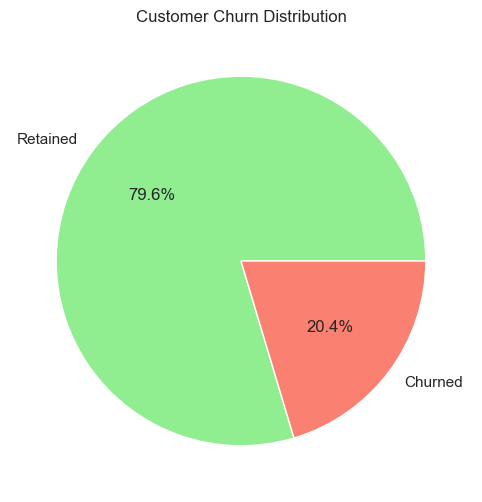

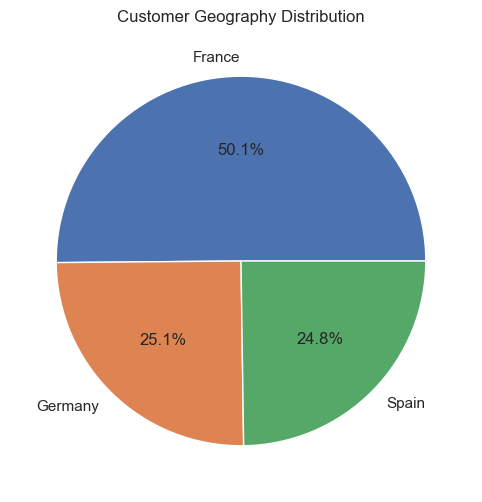

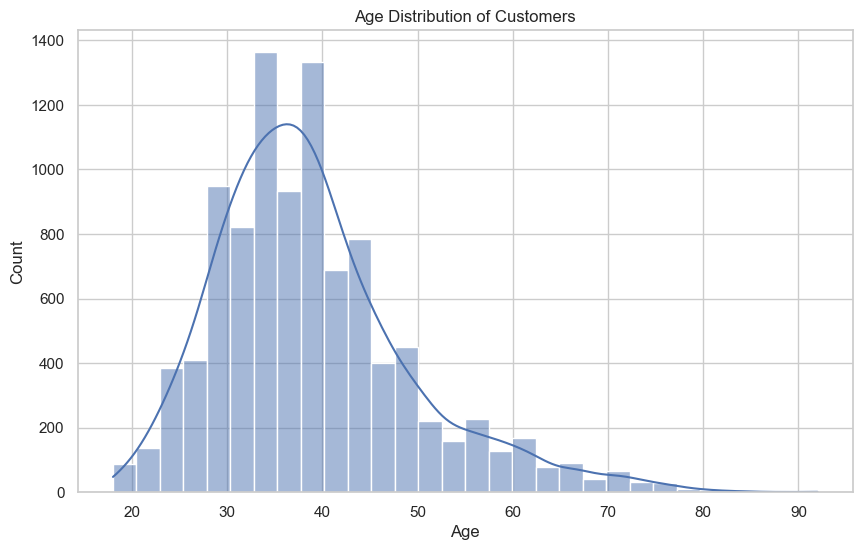

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Churn distribution pie chart
plt.figure(figsize=(8, 6))
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Retained', 'Churned'], colors=['lightgreen', 'salmon'])
plt.title('Customer Churn Distribution')
plt.ylabel('')
plt.show()

# Geography distribution
plt.figure(figsize=(8, 6))
df['Geography'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Customer Geography Distribution')
plt.ylabel('')
plt.show()

# Age distribution histogram
# Meant to identify churn, age and geography among customers

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


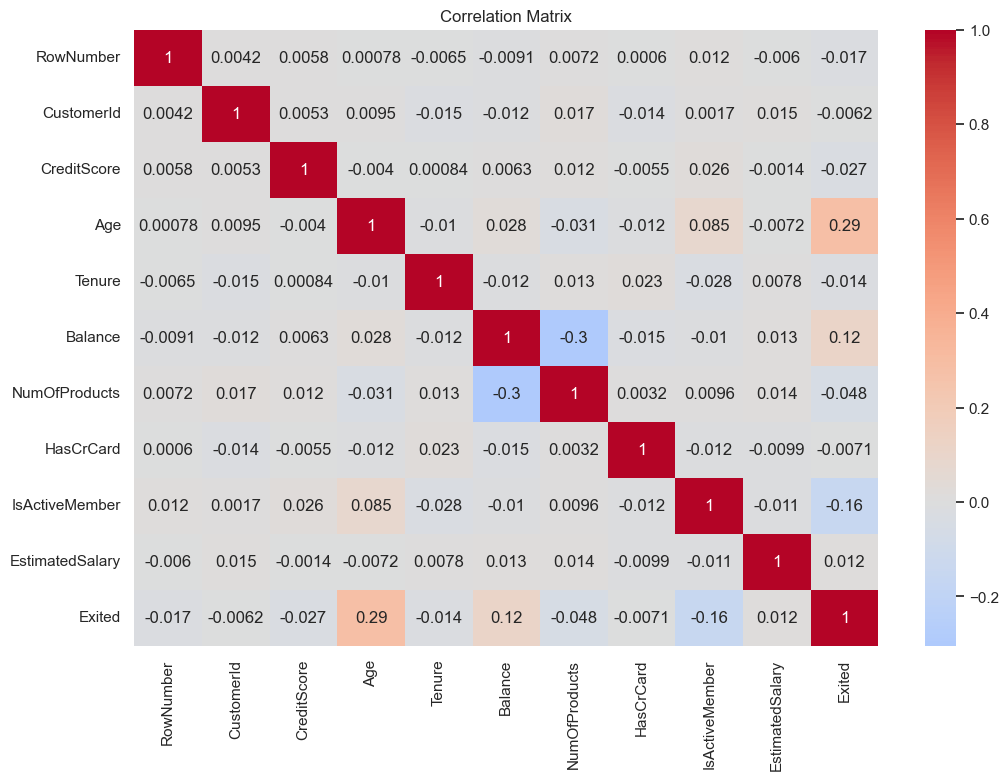


Correlation with Exited (Churn):
Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [16]:
# Correlation matrix (numerical features)
# Is there any correalation?
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Focus on correlations with Churn
print("\nCorrelation with Exited (Churn):")
print(corr_matrix['Exited'].sort_values(ascending=False))

# EFTER ANALYS ->
# Positiva samband (högre värden = mer churn):
# Ålder (Age): 0.285
# Ju äldre kunden är, desto mer sannolikt är det att de lämnar.
# Saldo (Balance): 0.119
# Kunder med högre saldon tenderar att lämna något mer.
# Nästan ingen koppling (~0):
# Lön (EstimatedSalary): 0.012
# Lön har praktiskt taget ingen effekt på churn.
# Kreditkort (HasCrCard): -0.007
# Att ha kreditkort spelar nästan ingen roll.
# Negativa samband (högre värden → mindre churn):
# Aktiv medlem (IsActiveMember): -0.156
# Aktiva medlemmar lämnar betydligt mindre ofta!
# Antal produkter (NumOfProducts): -0.048
# Fler produkter = lite färre avhopp.


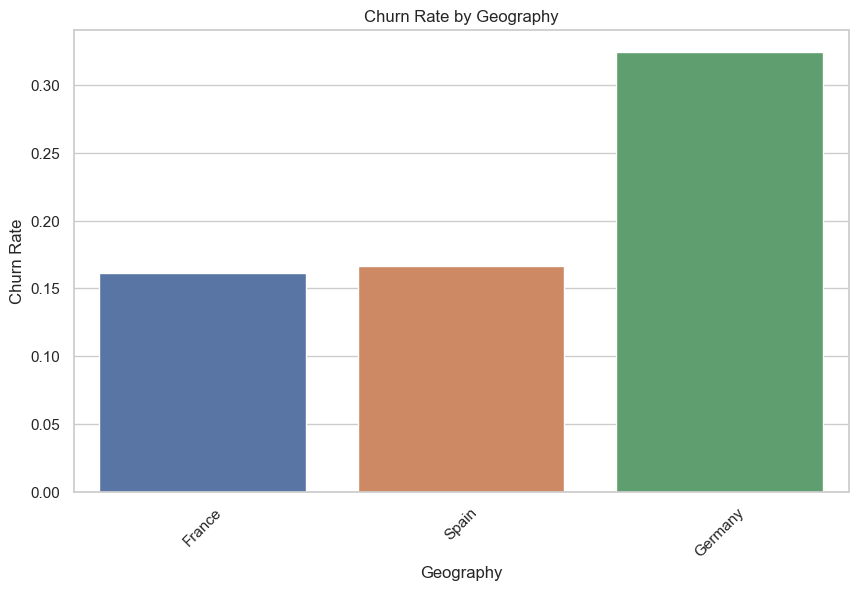

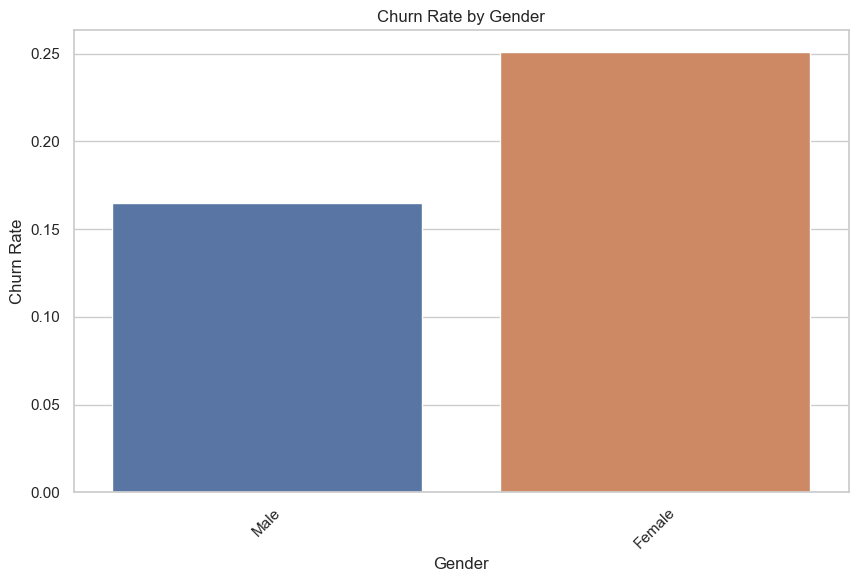

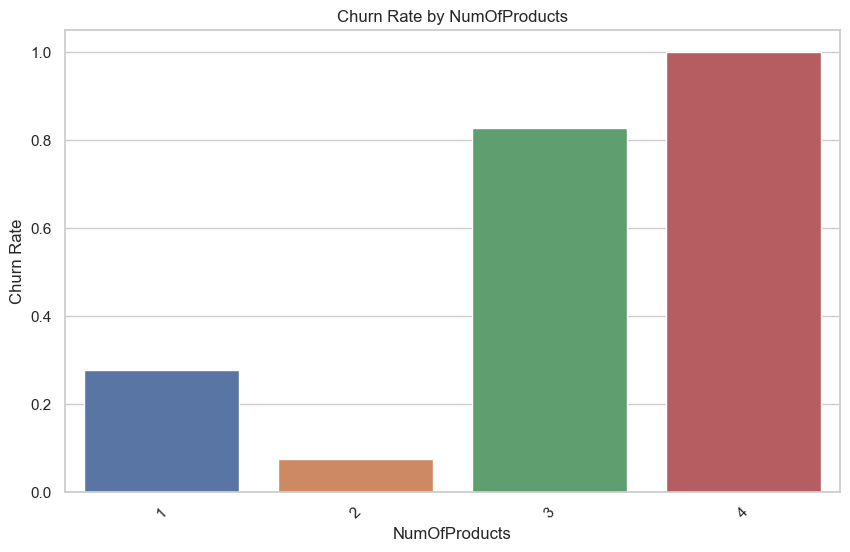

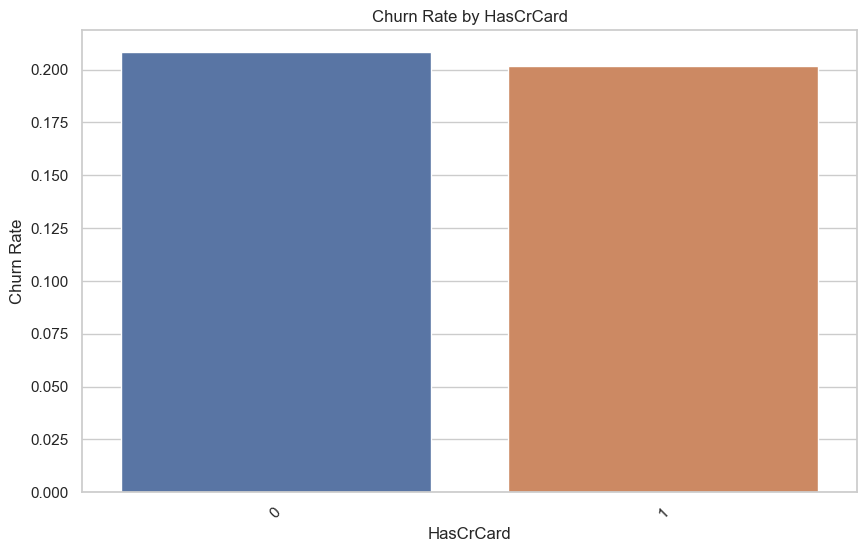

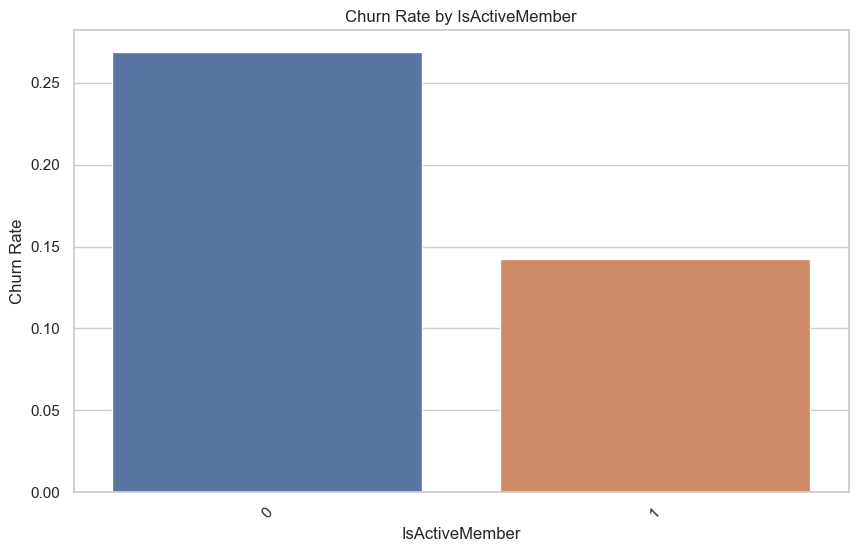

In [17]:
# Churn rate - Categories
def plot_churn_rate(feature):
    plt.figure(figsize=(10, 6))
    churn_rate = df.groupby(feature)['Exited'].mean().sort_values()
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()

# Analyze churn by different features
for feature in ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']:
    plot_churn_rate(feature)

In [12]:

df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [13]:
df.groupby('NumOfProducts')['Exited'].mean()

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64

In [15]:
# Insikter:
# Kvinnor lämnar i högre grad än män
# Churn rate är störst i Tyskland
# Aktiva medlemmar lämnar inte lika ofta som inaktiva medlemmar
# Graferna visar även att det finns ett starkt samband mellan antalet som lämnar om dessa har fler proodukter (100%)
# Förhållande 1:4 (en lämnar per fyra som stannar)


# Check class imbalance
churn_count = df['Exited'].value_counts()
print(f"\nChurn vs Retained: {churn_count[1]}:{churn_count[0]} (Ratio: {churn_count[1]/churn_count[0]:.2f})")



Churn vs Retained: 2037:7963 (Ratio: 0.26)


In [ ]:
# Churn vs Retained: 2037:7963 (Ratio: 0.26) - > Betyder:
# 2037 kunder har lämnat
# 7963 kunder har stannat
# 26% av kunderna har lämnat
# Varför är detta viktigt?

# Åtgärdsbehov?
# Ratio > 0.3 = Högt churn, behöver akut åtgärdas
# Ratio ~0.2 = Normalt för många branscher?
# Ratio <0.1 = Obalanserad data (behöver justeras)